# Linear Regression Model to Predict Life Expectancy

### Generate Model Trained and Tested Randomly

In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from joblib import dump, load

In [2]:
# read in data file
data = pd.read_csv('Data/Derived/final_data.csv')
data.head()

,state,year,quartile,gender,LE
0,al,2001,1,female,80.977432
1,al,2002,1,female,81.550888
2,al,2003,1,female,80.669098
3,al,2004,1,female,82.787102
4,al,2005,1,female,81.994995


In [3]:
# identify independent and dependent variables 
X = data[['state', 'year', 'quartile', 'gender']]
y = data['LE'].values.reshape(-1, 1)
print(X.shape, y.shape)

(5712, 4) (5712, 1)


In [4]:
# convert categorical variables to binary
X = pd.get_dummies(X, columns=['state', 'gender'])
X.head()

,year,quartile,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,...,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,gender_female,gender_male
0,2001,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2002,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2003,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2004,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2005,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# separate training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.head()

,year,quartile,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,...,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,gender_female,gender_male
479,2004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4202,2003,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4727,2010,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2215,2004,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1867,2006,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# scale data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\Kanika\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kanika\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\Kanika\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


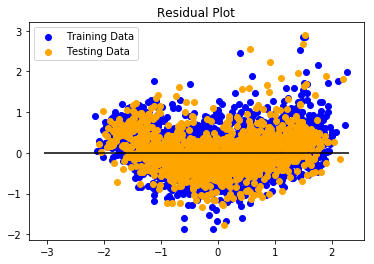

In [7]:
# plot the results
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [8]:
train_predictions = model.predict(X_train_scaled)
training_mse = mean_squared_error(y_train_scaled, train_predictions)
train_r2 = model.score(X_train_scaled, y_train_scaled)

test_predictions = model.predict(X_test_scaled)
testing_mse = mean_squared_error(y_test_scaled, test_predictions)
test_r2 = model.score(X_test_scaled, y_test_scaled)

print(f"Training MSE: {training_mse}, Training R2: {train_r2}")
print(f"Testing MSE: {testing_mse}, Testing R2: {test_r2}")

Training MSE: 0.2007051164457062, Training R2: 0.7992948835542938
Testing MSE: 0.23173310859021998, Testing R2: 0.7707976555734117


In [9]:
model.coef_

array([[ 1.46595633e-01,  7.06134602e-01,  7.91631866e+11,
         7.86999337e+11,  8.05356355e+11,  7.58561153e+11,
         7.82337107e+11,  8.14366622e+11,  7.48822825e+11,
         7.72921390e+11,  8.18831322e+11,  7.91631866e+11,
         7.43902275e+11,  8.09875116e+11,  8.14366622e+11,
         7.82337107e+11,  7.96235212e+11,  7.77644641e+11,
         8.00809879e+11,  8.05356355e+11,  7.91631866e+11,
         8.14366622e+11,  7.86999337e+11,  8.14366622e+11,
         8.05356355e+11,  8.18831322e+11,  8.14366622e+11,
         7.91631866e+11,  8.23269652e+11,  7.68166786e+11,
         7.63380241e+11,  7.28926742e+11,  8.09875116e+11,
         8.14366622e+11,  8.05356355e+11,  7.72921390e+11,
         7.53708896e+11,  8.00809879e+11,  7.96235212e+11,
         7.68166786e+11,  7.86999337e+11,  7.58561153e+11,
         7.58561153e+11,  7.77644641e+11,  8.09875116e+11,
         8.14366622e+11,  8.00809879e+11,  7.77644641e+11,
         8.00809879e+11,  8.23269652e+11,  8.23269652e+1

### Export Model and Scaler

In [10]:
# export model
production = LinearRegression()
production.fit(X_train_scaled, y_train)
dump(production, 'Model/model.joblib')
dump(X_scaler, 'Model/model_scaler.joblib')

['Model/model_scaler.joblib']

### Test Model

In [11]:
# dictionary for state names
us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

In [12]:
# read in data files
data = pd.read_csv('Data/Derived/final_data.csv')
income_quartile = pd.read_csv('Data/Derived/ref_2018.csv')

In [13]:
# create dataframe that can be used to select state inputs for model 
sel_state = pd.DataFrame(data['state'])
sel_state['state'] = sel_state['state'].str.upper()
sel_state['st_name'] = sel_state['state'].map(us_state_abbrev)
sel_state = pd.get_dummies(sel_state, columns=['state'])
sel_state = sel_state.drop_duplicates()
sel_state = sel_state.rename(columns={"st_name": "state"})
sel_state['state'] = sel_state['state'].str.lower()
sel_state = sel_state.set_index('state')
sel_state.head()

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
state,,,,,,,,,,,,,,,,,,,,,
alabama,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alaska,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
arizona,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
arkansas,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
california,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# create dataframe that can be used to select income inputs for model 
income_quartile = income_quartile.rename(columns={"State": "state", "_25th_Percentile": "_25", "Median": "_50", "_75th_Percentile": "_75"})
income_quartile['state'] = income_quartile['state'].str.lower()
income_quartile = income_quartile.set_index('state')
income_quartile.head()

,_25,_50,_75
state,,,
alabama,19000,37014,60150
alaska,20000,41269,71113
arizona,20000,36000,62000
arkansas,19440,33300,59000
california,20000,39500,73483


In [15]:
# function that creates input for model based on values provided
def user_input(u_year, u_income, u_state, u_gender):
    user_df = pd.DataFrame()
    user_df['year'] = [u_year]
    u_state = u_state.lower()
    if u_income <= income_quartile.loc[u_state, '_25']:
        user_df['quartile'] = [1]
    elif u_income <= income_quartile.loc[u_state, '_50']:
        user_df['quartile'] = [2]
    elif u_income <= income_quartile.loc[u_state, '_75']:
        user_df['quartile'] = [3]
    else:
        user_df['quartile'] = [4]
    user_df['state'] = u_state
    new_df = sel_state.loc[[u_state]]
    user_df = pd.merge(user_df, new_df, on = 'state')
    user_df = user_df.drop(columns=['state'])  
    u_gender = u_gender.lower()
    if u_gender == 'female':
        x = 1
        y = 0
    elif u_gender == 'male':  
        x = 0
        y = 1
    user_df['gender_Female'] = [x]
    user_df['gender_Male'] = [y] 
    return user_df

In [16]:
# import model and scaler
model = load('model/model.joblib')
X_scaler = load('model/model_scaler.joblib')

In [17]:
# test model
mytest = user_input(2020, 10000, 'Alabama', 'Female')
mytest_scaled = X_scaler.transform(mytest)
predict_le = model.predict(mytest_scaled)
predict_le

C:\Users\Kanika\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[82.51622101]])